<a href="https://colab.research.google.com/github/iamJohnnySam/ImageRepeatabilityCalculator/blob/master/Project_K_Image_Recog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [124]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [125]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [126]:
from google.colab.patches import cv2_imshow

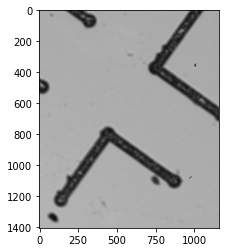

In [127]:
template = cv.imread("gdrive/MyDrive/Mindox_Techno/Repeatability/Template.jpg")
plt.imshow(template, cmap='gray')

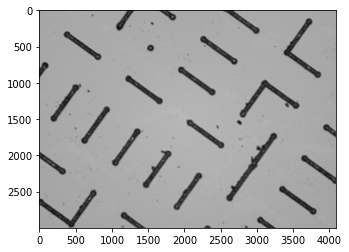

In [128]:
img_orig = cv.imread("gdrive/MyDrive/Mindox_Techno/Repeatability/Images/Image__2023-01-27__14-34-26.bmp")
plt.imshow(img_orig, cmap='gray')

In [129]:
w = template.shape[0]
print (w)

h = template.shape[1]
print (h)

1404
1157


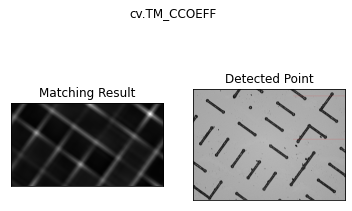

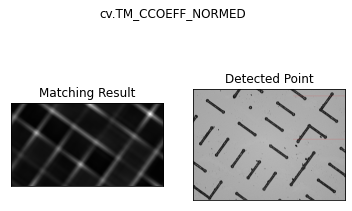

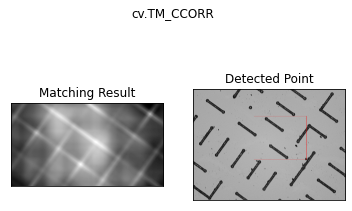

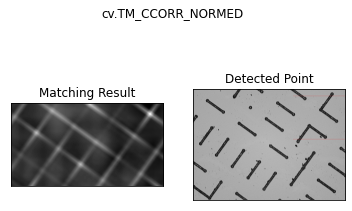

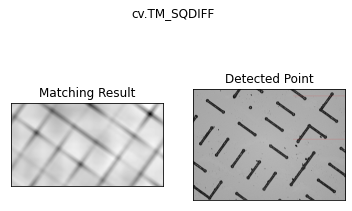

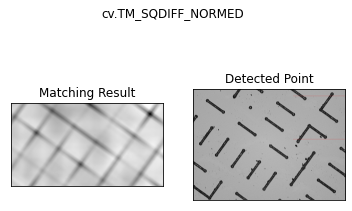

In [130]:
img2 = img_orig.copy()
# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

(array([190, 190, 190, ..., 232, 232, 232]), array([2663, 2664, 2665, ..., 2681, 2682, 2683]))


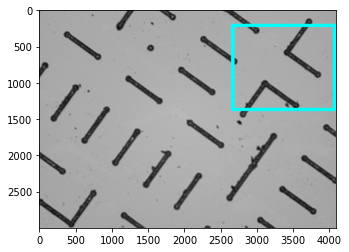

In [131]:
img = img_orig.copy()
res = cv.matchTemplate(img, template, cv.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where(res >= threshold)

x_orig = 0
y_orig = 0
i = 0

print(loc)
for pt in zip(*loc[::-1]):
    cv.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0, 255, 255), 2)
    i += 1
    x_orig = x_orig + pt[0]
    y_orig = y_orig + pt[1]
  
plt.imshow(img, cmap='gray')

x_orig = x_orig/i
y_orig = y_orig/i

In [132]:
print (x_orig)
print (y_orig)

2671.957396449704
211.1319526627219


In [142]:
import os
directory = 'gdrive/MyDrive/Mindox_Techno/Repeatability/Images/'

x_arr = np.array([0])
y_arr = np.array([0])

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        img2 = cv.imread(f)
        res = cv.matchTemplate(img2, template, cv.TM_CCOEFF_NORMED)
        threshold = 0.8
        loc = np.where(res >= threshold)
        x = 0
        y = 0
        i = 0
        
        for pt in zip(*loc[::-1]):
            cv.rectangle(img2, pt, (pt[0] + w, pt[1] + h), (0, 255, 255), 2)
            i += 1
            x = x+pt[0]
            y = y+pt[1]

        if(i != 0):
            x = ((x/i) - x_orig)*2.355/4096   
            y = ((y/i) - y_orig)*1.725/3000

            if (x<0.1 and y<0.1) and (x> -0.1 and y> -0.1):
              x_arr = np.append(x_arr, x)
              y_arr = np.append(y_arr, y)

        print(filename+"  -  "+str(x)+", "+str(y))
        #plt.suptitle(filename)
        #plt.imshow(img2, cmap='gray')
        #plt.show()

Image__2023-01-27__14-34-26.bmp  -  0.0, 0.0
Image__2023-01-27__14-38-15.bmp  -  0.01615562213055664, -0.025218029643810178
Image__2023-01-27__14-39-02.bmp  -  -0.016727664529537205, 0.05016825726107821
Image__2023-01-27__14-47-27.bmp  -  -0.016481381202871376, 0.008554399425238638
Image__2023-01-27__14-48-16.bmp  -  0.0026020655646349492, -0.055539443348013216
Image__2023-01-27__14-49-02.bmp  -  -0.03937816878177086, -0.025134053525306083
Image__2023-01-27__14-50-32.bmp  -  -0.013753580488396653, -0.04031396449704142
Image__2023-01-27__14-51-19.bmp  -  -0.041131473372070425, 0.01293042619422123
Image__2023-01-27__14-16-36.bmp  -  -0.12184904643984769, -0.009269919675096747
Image__2023-01-27__14-28-17.bmp  -  -0.026584746441298025, 0.01663149707365646
Image__2023-01-27__14-29-04.bmp  -  -0.035236022174891, -0.06297842765074958
Image__2023-01-27__14-29-48.bmp  -  -0.010120324246340103, 0.05957259292290604
Image__2023-01-27__14-30-35.bmp  -  -0.033355792314716935, 0.01456509784105473
Ima

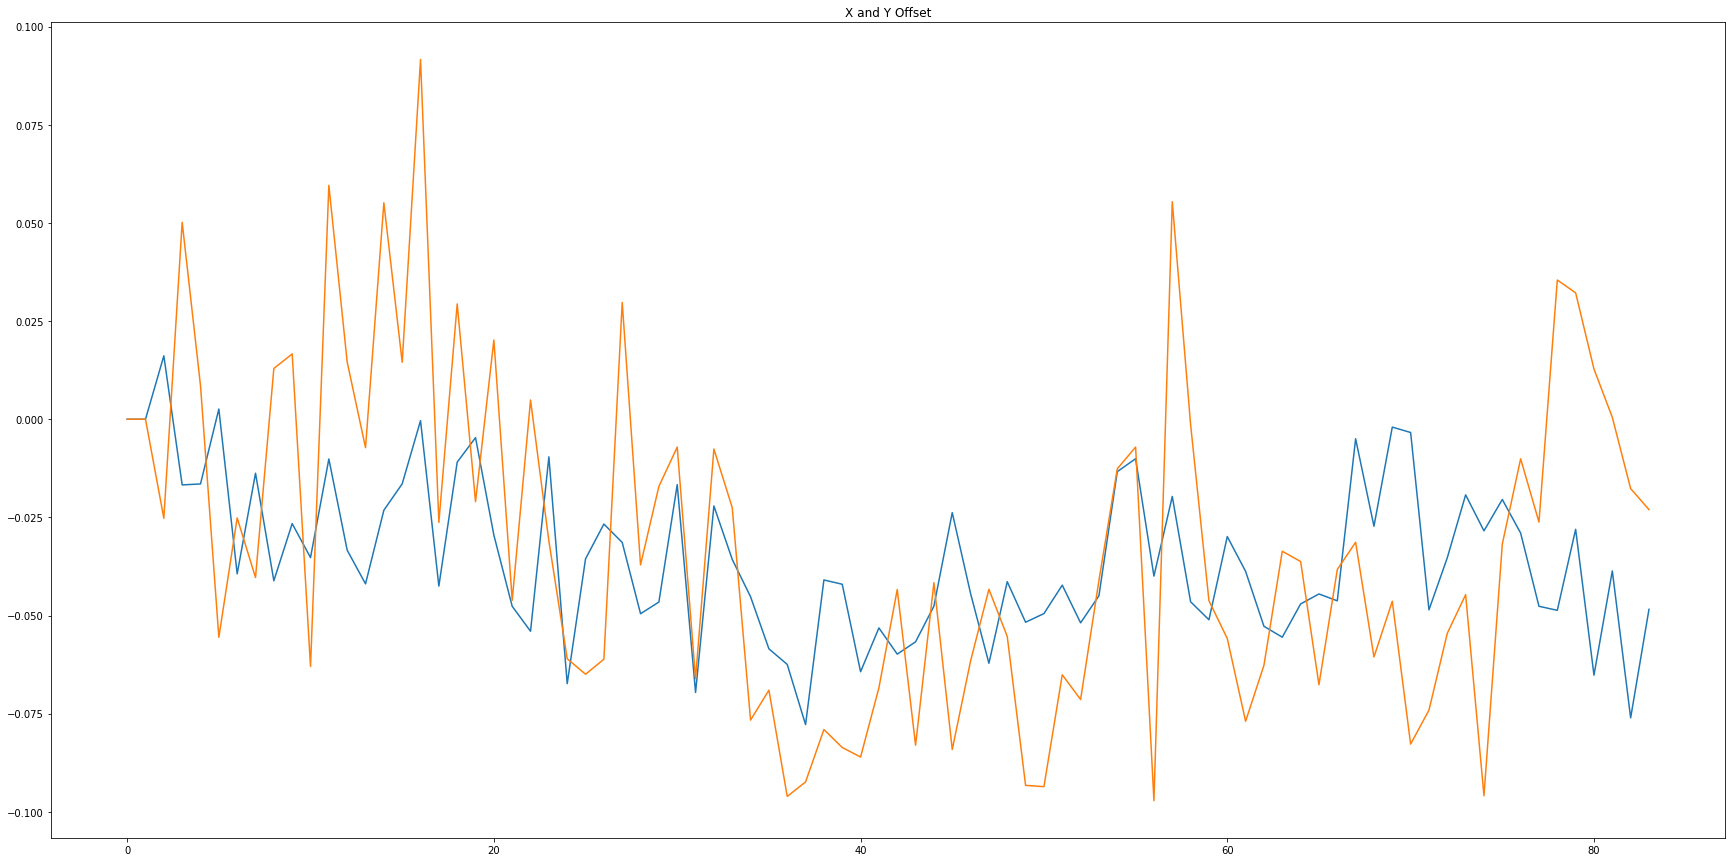

In [144]:
fig1 = plt.figure()
fig1.set_figwidth(30)
fig1.set_figheight(15)
fig1 = plt.title("X and Y Offset")
fig1 = plt.plot(x_arr)
fig1 = plt.plot(y_arr)

fig1 = plt.show()

In [135]:
# MEASURE ERROR
errtemplate = cv.imread("gdrive/MyDrive/Mindox_Techno/Repeatability/errTemplate.png")

import os
directory = 'gdrive/MyDrive/Mindox_Techno/Repeatability/Error/'

xerr_arr = np.array([0])
yerr_arr = np.array([0])

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        img2 = cv.imread(f)
        res = cv.matchTemplate(img2, errtemplate, cv.TM_CCOEFF_NORMED)
        threshold = 0.8
        loc = np.where(res >= threshold)
        xerr = 0
        yerr = 0
        i = 0
        
        for pt in zip(*loc[::-1]):
            cv.rectangle(img2, pt, (pt[0] + w, pt[1] + h), (0, 255, 255), 2)
            i += 1
            xerr = xerr+pt[0]
            yerr = yerr+pt[1]

        if(i != 0):
            xerr = ((xerr/i)*2.355/956) - 2.0954297504671455
            yerr = ((yerr/i)*1.725/698) - 0.2781079789713646
            xerr_arr = np.append(xerr_arr, xerr)
            yerr_arr = np.append(yerr_arr, yerr)

        print(filename+"  -  "+str(xerr)+", "+str(yerr))

2023-01-28 (15).png  -  0.005174605919760822, 0.0006890040052071611
2023-01-28 (14).png  -  0.00961045218446488, 0.0020772317857037925
2023-01-28 (13).png  -  0.002335577823810553, -0.001697355211170648
2023-01-28 (12).png  -  0.006528627464157388, -0.0027539775053820326
2023-01-28 (11).png  -  0.003870458737875282, -0.004021092067605925
2023-01-28 (10).png  -  0.0055127181521013036, -0.00041098756735308273
2023-01-28 (9).png  -  0.009872170415319292, 0.0008974353850526584
2023-01-28 (8).png  -  0.0036584201805958116, -0.0027874429008556967
2023-01-28 (7).png  -  0.007673691210576816, 0.0013953056746623949
2023-01-28 (6).png  -  0.012551781779283733, 0.001977980914022237
2023-01-28 (5).png  -  0.0004525063320173217, -0.00391206206592043
2023-01-28 (4).png  -  0.007323986787597381, 0.0048012345930497635
2023-01-28 (3).png  -  0.0108689068481711, 0.0030988649386359257
2023-01-28 (2).png  -  0.023213195401055486, -0.0012399184412786313
2023-01-28 (18).png  -  0.0077099479890656575, -0.002

In [136]:
print(np.mean(xerr))
print(np.mean(yerr))

0.015694726520302016
0.006096892088807315


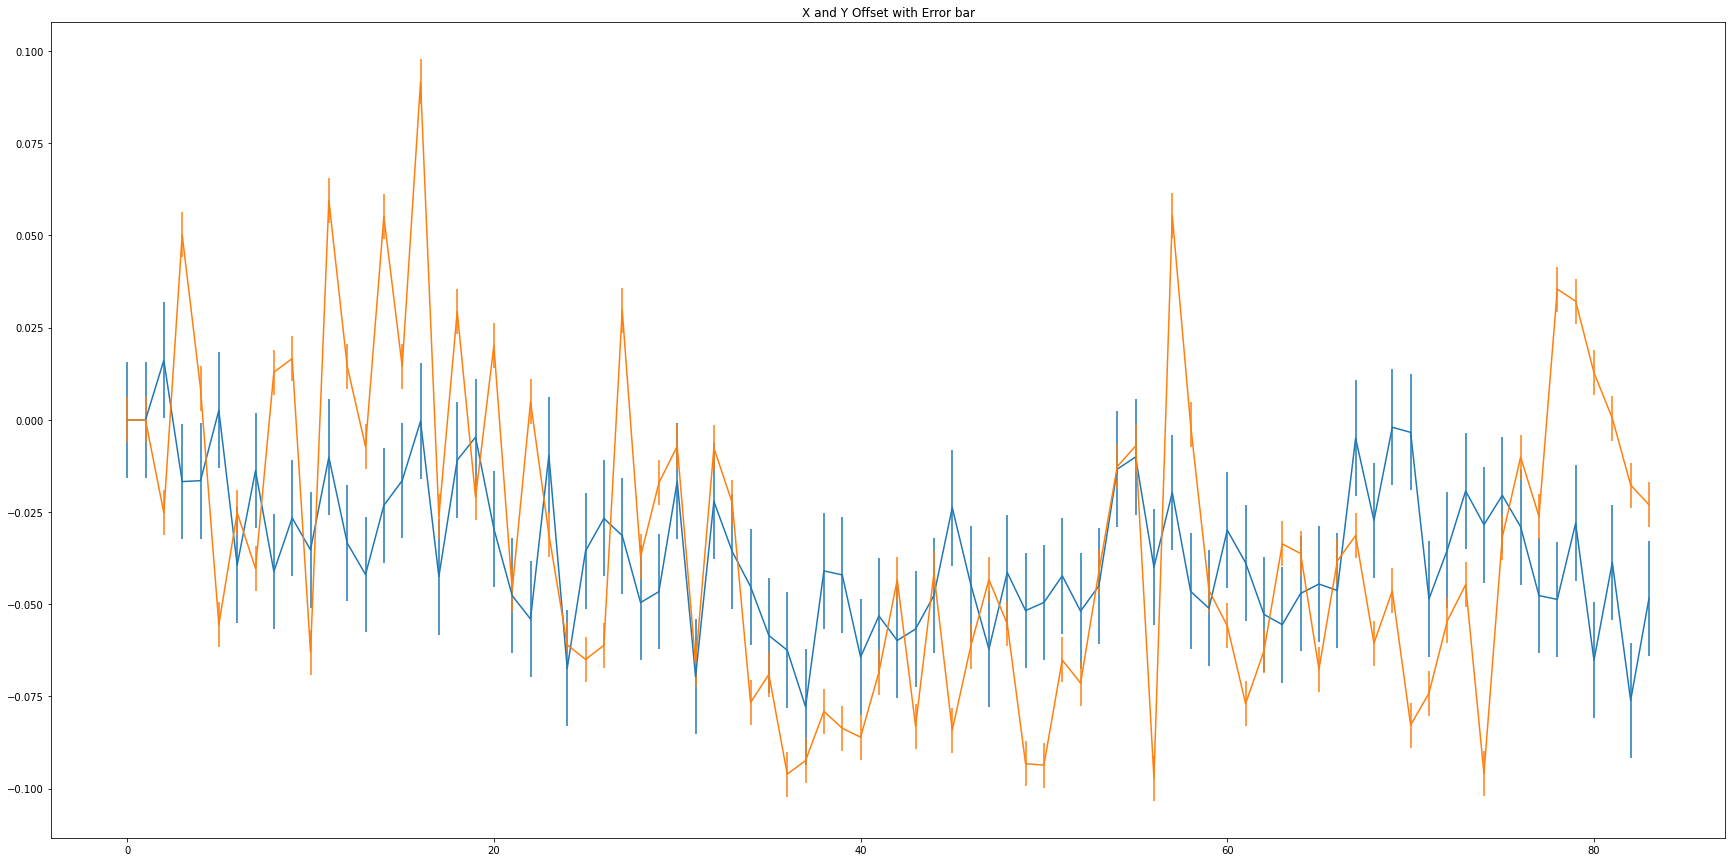

In [145]:
fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(15)
fig = plt.title("X and Y Offset with Error bar")
fig = plt.errorbar(np.arange(x_arr.size), x_arr, yerr=np.mean(xerr))
fig = plt.errorbar(np.arange(y_arr.size), y_arr, yerr=np.mean(yerr))


fig = plt.show()

In [138]:
x_arr

array([ 0.        ,  0.        ,  0.01615562, -0.01672766, -0.01648138,
        0.00260207, -0.03937817, -0.01375358, -0.04113147, -0.02658475,
       -0.03523602, -0.01012032, -0.03335579, -0.04193021, -0.02318013,
       -0.01645539, -0.04249699, -0.01092975, -0.00468665, -0.02952687,
       -0.04764865, -0.05399947, -0.00958304, -0.06735741, -0.03555719,
       -0.02669898, -0.03138055, -0.0495414 , -0.04656156, -0.01666519,
       -0.069596  , -0.02208768, -0.03568736, -0.0452179 , -0.05847378,
       -0.04093929, -0.04203034, -0.06431016, -0.05315422, -0.05983037,
       -0.05669787, -0.04761467, -0.02378831, -0.04440212, -0.0621598 ,
       -0.04137302, -0.04226154, -0.05185909, -0.04496797, -0.01335545,
       -0.01005321, -0.01967132, -0.04649314, -0.05107836, -0.02988009,
       -0.03874567, -0.05273751, -0.05551778, -0.04704817, -0.04450664,
       -0.04625046, -0.00497155, -0.02725752, -0.0020011 , -0.00337953,
       -0.04854812, -0.03527598, -0.01926627, -0.02043925, -0.02

In [139]:
y_arr

array([ 0.        ,  0.        , -0.02521803,  0.05016826,  0.0085544 ,
       -0.05553944, -0.02513405, -0.04031396,  0.01293043,  0.0166315 ,
       -0.06297843,  0.05957259,  0.0145651 , -0.00723994,  0.05512347,
        0.01450028, -0.0262768 ,  0.02937305, -0.02099455,  0.02017102,
       -0.04612402,  0.00489112, -0.03102205, -0.06099568, -0.06495413,
       -0.06112932,  0.02974965, -0.03710281, -0.01710241, -0.00710266,
       -0.06608389, -0.00757548, -0.02250876, -0.07663462, -0.06901229,
       -0.07903823, -0.08360685, -0.08603592, -0.06840279, -0.04337348,
       -0.08302504, -0.04163628, -0.08412057, -0.06155503, -0.0433156 ,
       -0.05532362, -0.06508545, -0.07138002, -0.04109254, -0.01263839,
       -0.00709148,  0.05540628, -0.00137149, -0.04622256, -0.05584304,
       -0.07693811, -0.06266329, -0.0336268 , -0.03624234, -0.06762175,
       -0.03829315, -0.03133554, -0.06055372, -0.0463632 , -0.08274603,
       -0.07409775, -0.05451613, -0.04469479, -0.03178882, -0.01

In [146]:
print(max(x_arr) - min(x_arr))
print(max(y_arr) - min(y_arr))

0.09393670409246492
0.1888071769689279
